https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset


# Análise da turbina eólica

## Introdução

O concreto é o material mais importante na engenharia civil. A resistência à compressão do concreto é uma função altamente não linear da idade e dos ingredientes. Esses ingredientes incluem cimento, escória de alto forno, cinzas volantes, água, superplastificante, agregado graúdo e agregado miúdo.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa: Tratamento dos dados;
* 2ª Etapa: Análises dos dados e conclusões;
* 3º Etapa: Modelagem preditiva;

## Objeto de análise:

O objetivo dessa análise é criar um modelo para prever o valor de resistência à compressão do concreto. A constituição básico do concreto é:

$Concreto = Cimento + H_{2}O + Agregado_{miudo} + Agregado_{graudo}$

**A dosagem do concreto está relacionado com:**

* $f_{ck}$  do cimento;
* Eficiência da cura;
* Dosagem de água;
* etc...

`Resistência a compressão:` é o principal parâmetro de estruturas de concreto. Além disso, será a variável independete.


## Objetivos

Os objetivos da análise são:

* Encontrar as variáveis mais correlacioandas;
* Encontrar o melhor modelo preditivo;

## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

Attribute Information
* Cimento : medido em $kg/m^{3}$
* Jateamento : medido em $kg/m^{3}$
* Cinza volante : medido em $kg/m^{3}$
* Água : medido em $kg/m^{3}$
* Super plastificante : medido em $kg/m^{3}$
* Agregado graúdo : medido em $kg/m^{3}$
* Agregado miúdo : medido em $kg/m^{3}$
* Idade : medido em dias (1~365)
* Resistência da compressão do concreto: medido em $MPa$


**FONTE:**
* https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset


**LIMITAÇÕES DA ANÁLISE:**
* O dataset não informa o valor do $f_{ck}$ do cimento utilizado.

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

# configurações
import warnings
warnings.filterwarnings('ignore')

# 1º Etapa: Tratamento dos dados

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Importando o dataset

In [123]:
concreto_df = pd.read_csv('dados/concrete.csv')
concreto_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Renomeando o dataset

In [124]:
nomes = {
    'cement':'cimento',
    'slag':'jateamento',
    'ash':'cinzas',
    'water':'agua',
    'superplastic':'super_plastificante',
    'coarseagg':'agg_graudo',
    'fineagg':'agg_miudo',
    'age':'idade',
    'strength':'fck'
}

concreto_df.rename(mapper=nomes, axis=1, inplace=True)

## Estatísticas descritivas do dataset

In [125]:
concreto_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cimento,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
jateamento,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
cinzas,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
agua,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
super_plastificante,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
agg_graudo,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
agg_miudo,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
idade,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
fck,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Dados nulos, tipos de dados e otimização de memória

In [126]:
concreto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cimento              1030 non-null   float64
 1   jateamento           1030 non-null   float64
 2   cinzas               1030 non-null   float64
 3   agua                 1030 non-null   float64
 4   super_plastificante  1030 non-null   float64
 5   agg_graudo           1030 non-null   float64
 6   agg_miudo            1030 non-null   float64
 7   idade                1030 non-null   int64  
 8   fck                  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


* Verifiando os tipos dos dados

In [127]:
concreto_df.isnull().sum().sum()

0

* Otimizando os dados

In [128]:
concreto_df.idade = concreto_df.idade.astype('int16')

* Verificando duplicadas

In [129]:
duplicadas = concreto_df.duplicated()
concreto_df = concreto_df[~duplicadas]

In [130]:
concreto_df

,cimento,jateamento,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


## Exportando dataset modificado

In [131]:
concreto_df.to_csv('dados/concreto.csv', encoding='utf-8', index=False )

# 2º Etapa: Análise de dados

In [132]:
concreto_df.sample(3)

,cimento,jateamento,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
736,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59
205,122.6,183.9,0.0,203.5,0.0,958.2,800.1,28,24.29


## Analisando a correlação entre as variáveis

In [133]:
def correlacao(data, var1, var2, titulo, xlabel, ylabel):
    plt.figure(figsize=(20, 8))
    sns.scatterplot(x=data[var1], y=data[var2],
                     data=data, color='orange', alpha=0.5)
    plt.grid()
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    

Text(0, 0.5, '$f_{ck}$ (MPa)')

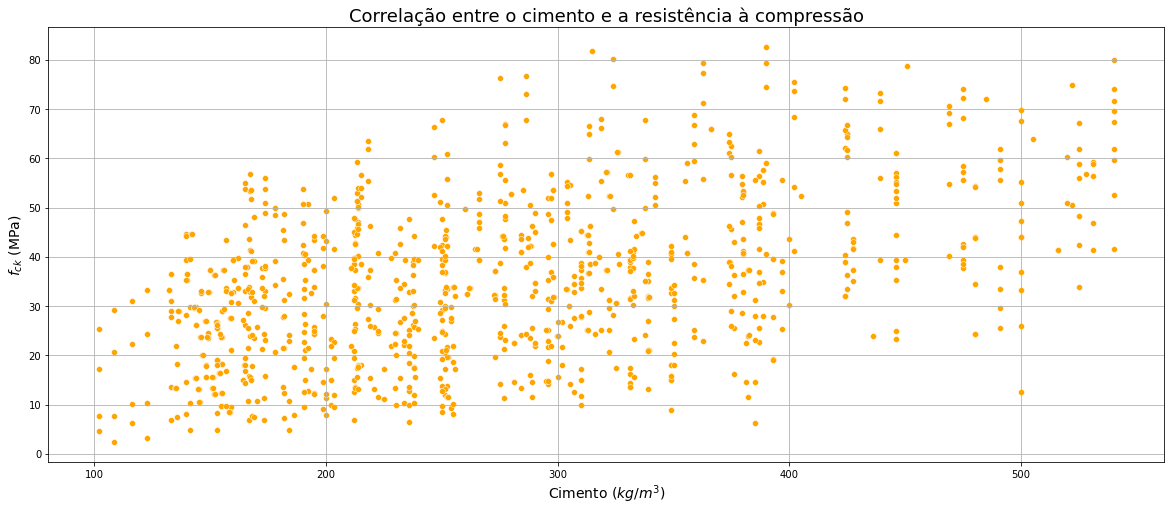

In [134]:
plt.figure(figsize=(20, 8))


sns.scatterplot(x=concreto_df.cimento, y=concreto_df.fck,
                     data=concreto_df, color='orange', alpha=1)

plt.grid()
plt.title("Correlação entre o cimento e a resistência à compressão", fontsize=18)
plt.xlabel("Cimento ($kg/m^{3}$)", fontsize=14)
plt.ylabel("$f_{ck}$ (MPa)", fontsize=14)

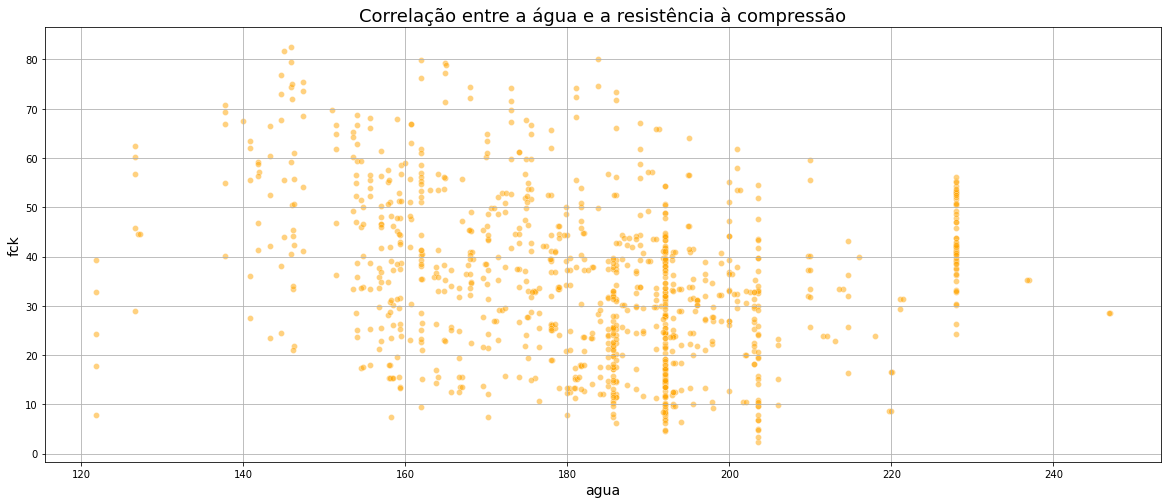

In [135]:
correlacao(concreto_df, 'agua', 'fck', 'Correlação entre a água e a resistência à compressão', 'agua', 'fck')

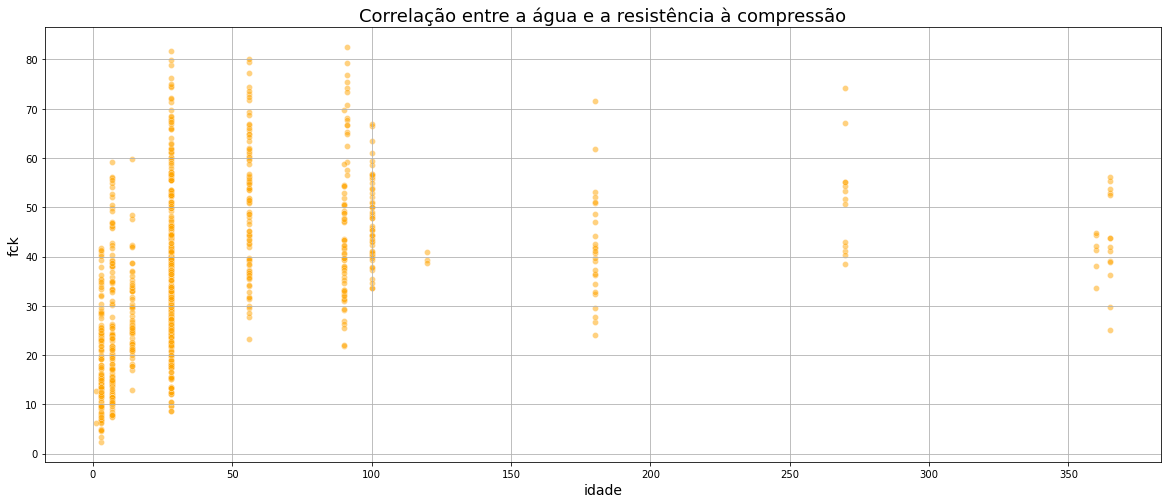

In [136]:
correlacao(concreto_df, 'idade', 'fck', 'Correlação entre a água e a resistência à compressão', 'idade', 'fck')

In [137]:
np.sort(concreto_df.idade.unique())


array([  1,   3,   7,  14,  28,  56,  90,  91, 100, 120, 180, 270, 360,
       365], dtype=int16)

In [138]:
concreto_df.corr()

,cimento,jateamento,cinzas,agua,super_plastificante,agg_graudo,agg_miudo,idade,fck
cimento,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
jateamento,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
cinzas,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
agua,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
super_plastificante,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
agg_graudo,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
agg_miudo,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
idade,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
fck,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


## Análise univariada

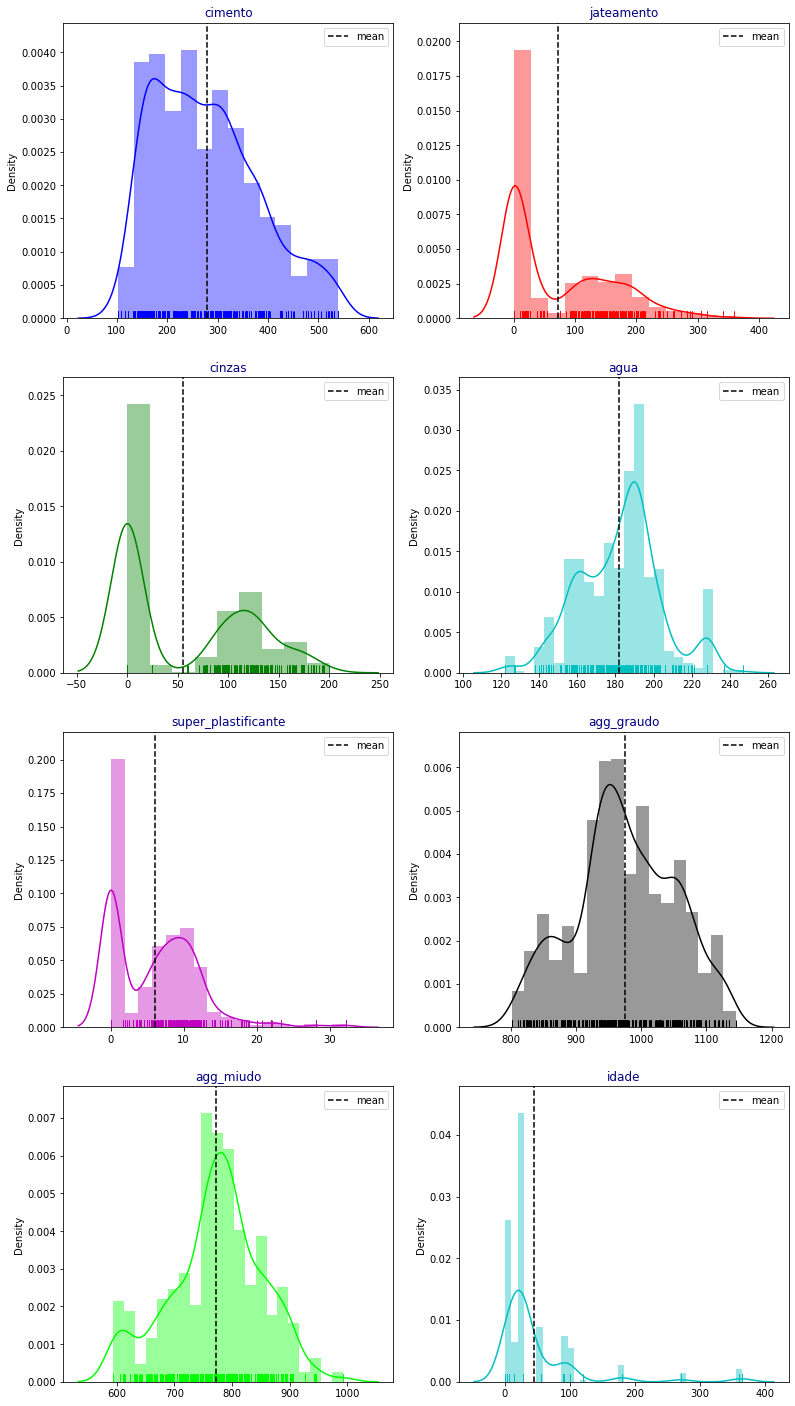

In [152]:
cols = [i for i in concreto_df.columns if i not in 'fck']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concreto_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concreto_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Univariate analysis:

Cement column - Right skewed distribution -- cement is skewed to higher values
Slag column - Right skewed distribution -- slag is skewed to higher values and there are two gaussians
Ash column - Right skewed distribution -- ash is skewed to higher values and there are two gaussians
Water column - Moderately left skewed distribution
Superplastic column - Right skewed distribution -- superplastic is skewed to higher values and there are two gaussians
Coarseagg column - Moderately left skewed distribution
Fineagg column - Moderately left skewed distribution
Age column - Right skewed distribution -- age is skewed to higher values and there are five gaussians

## Verificando outliers

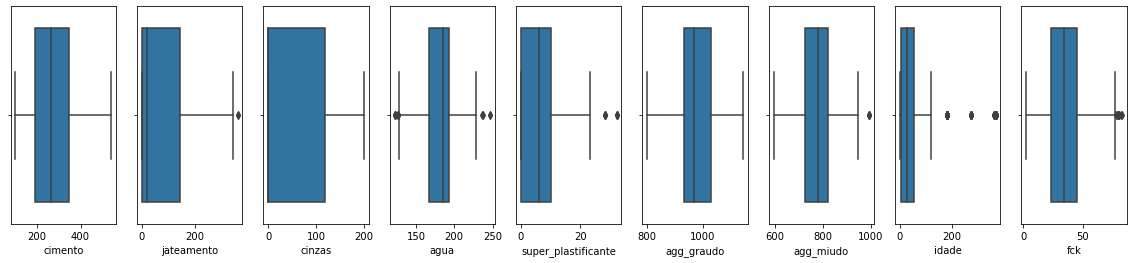

In [148]:
columns = concreto_df.columns
i=1

plt.figure(figsize=(20, 4))
for each in columns:
    df = concreto_df[each]
    plt.subplot(1, len(columns), i)
    sns.boxplot(df)
    i += 1

# 3º Clustering

In [140]:
from sklearn.cluster import KMeans

In [141]:
cluster_df = concrete_df.copy()
cluster_df.drop(labels='idade', axis=1, inplace=True)

In [142]:
kmeans = KMeans(n_clusters = 2, random_state=9)

In [143]:
x = cluster_df

In [144]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

In [149]:
kmeans.algorithm

'auto'

<AxesSubplot:xlabel='fck', ylabel='cimento'>

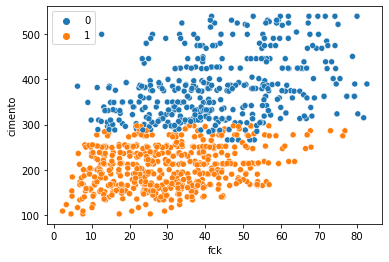

In [145]:
sns.scatterplot(x = 'fck', y = 'cimento', data=cluster_df, hue = kmeans.labels_)

# 4º Regressão